<a href="https://colab.research.google.com/github/mounikasrinivasarao/Apna-ML-Internship/blob/main/Customer_Churn_Prediction_Apna_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [29]:
df = pd.read_csv('/content/Churn-Data.csv')
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [30]:
df.describe()

,SeniorCitizen,tenure,Charges_Month
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Exploratory Data Analysis(EDA)**

In [32]:
df.isna().sum()

cID                 0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
TV_Streaming        0
Movie_Streaming     0
Contract            0
PaperlessBilling    0
Method_Payment      0
Charges_Month       0
TotalCharges        0
Churn               0
dtype: int64

Columns in DataFrame: Index(['cID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'TV_Streaming',
       'Movie_Streaming', 'Contract', 'PaperlessBilling', 'Method_Payment',
       'Charges_Month', 'TotalCharges', 'Churn'],
      dtype='object')


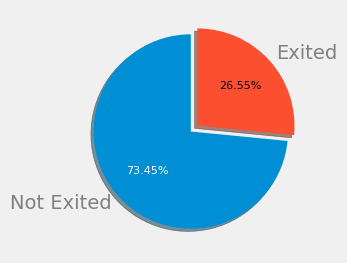

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Columns in DataFrame:", df.columns)

values = df.Churn.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode)

plt.setp(texts, color='grey')
plt.setp(autotexts, size=8, color='white')
autotexts[1].set_color('black')
plt.show()


**20% of the customers have churned and 80% haven't**

#visualizing categorical variables

Columns in DataFrame: Index(['cID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'TV_Streaming',
       'Movie_Streaming', 'Contract', 'PaperlessBilling', 'Method_Payment',
       'Charges_Month', 'TotalCharges', 'Churn'],
      dtype='object')


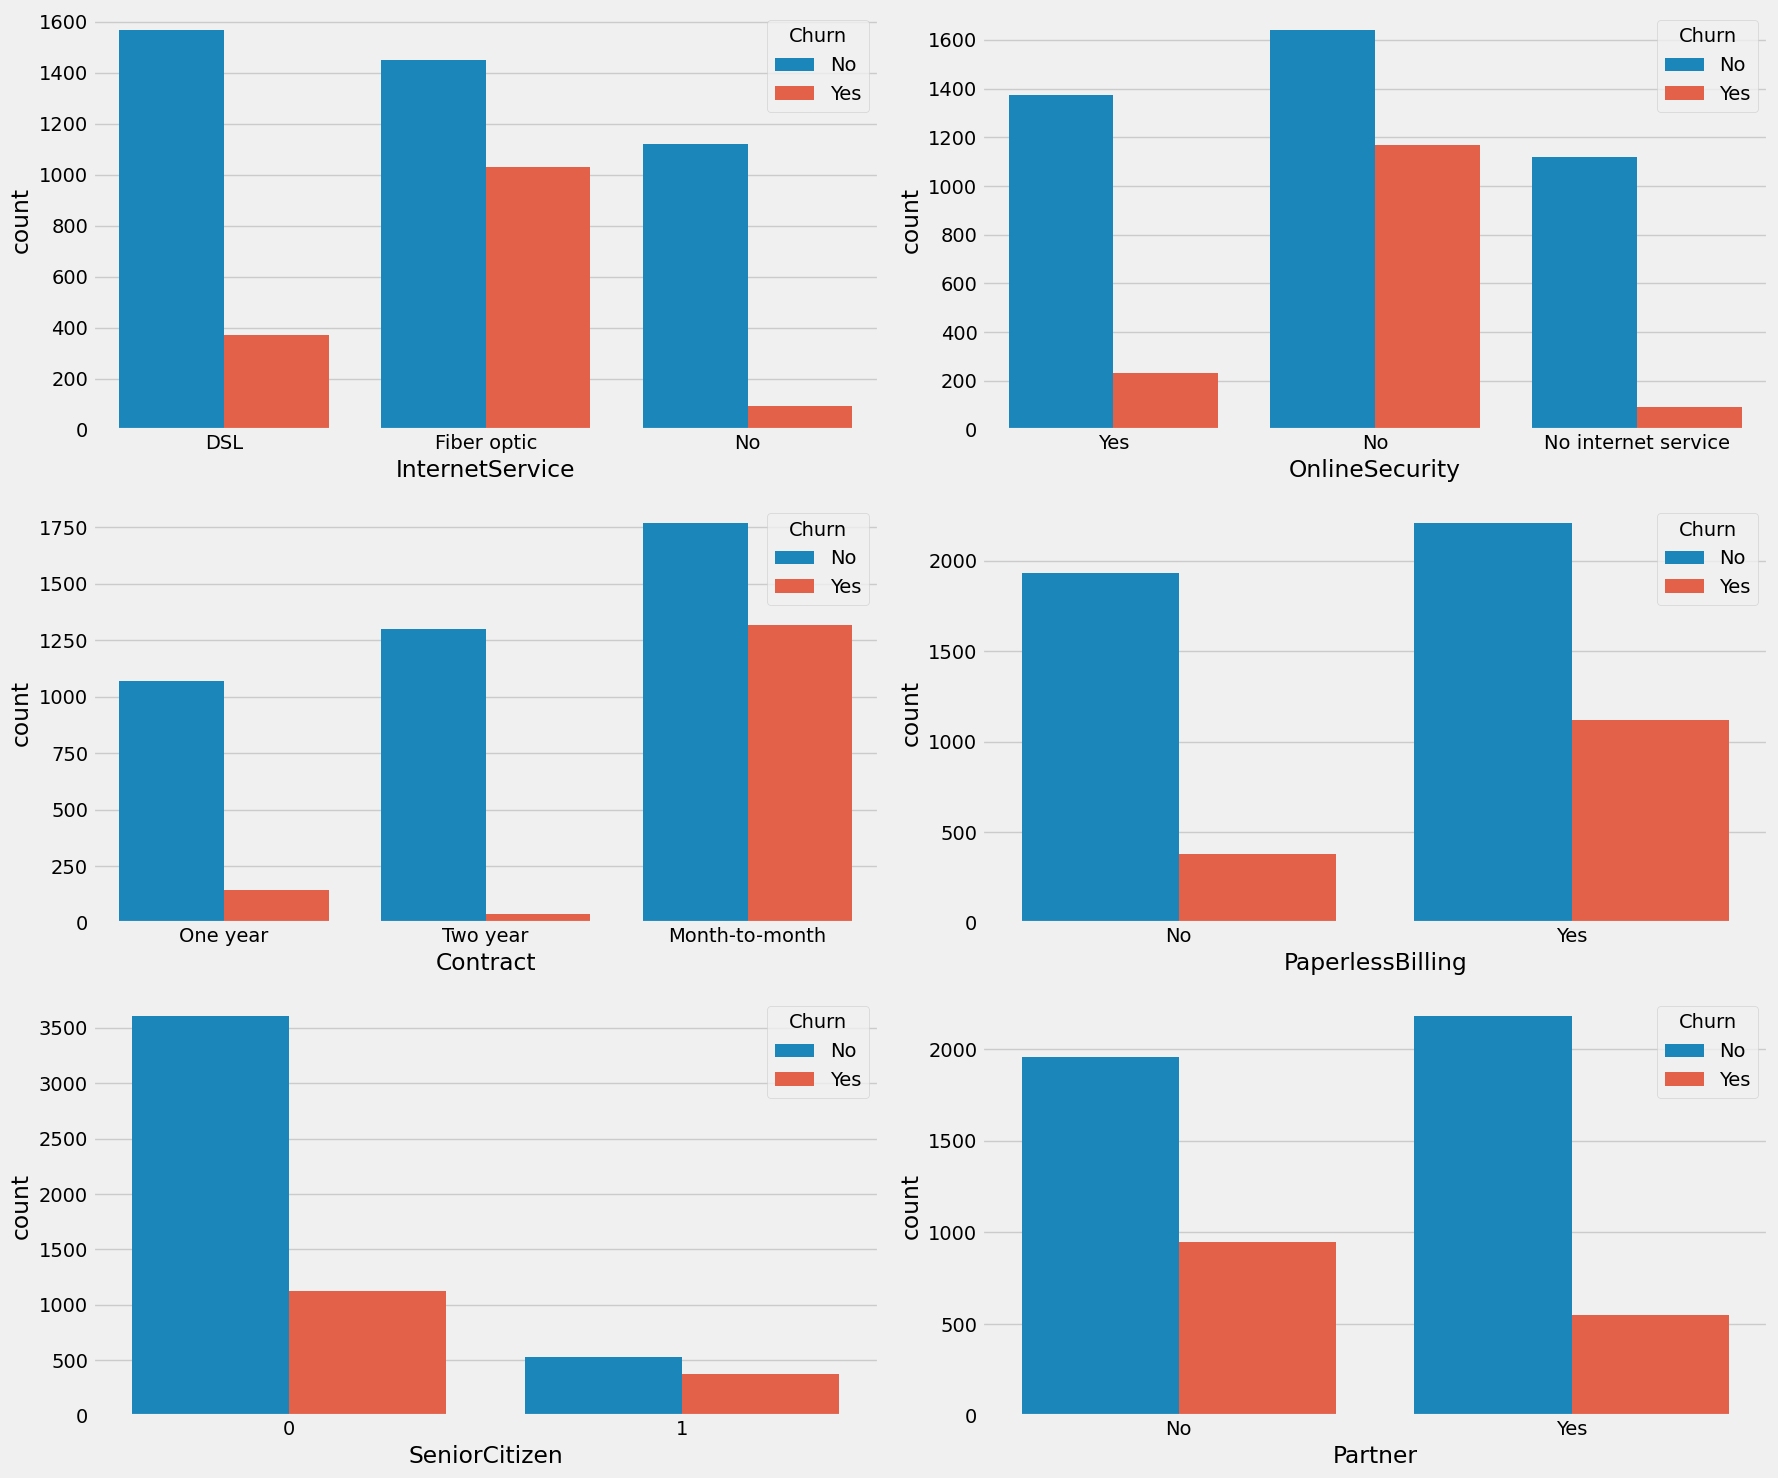

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Columns in DataFrame:", df.columns)

fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='InternetService', hue='Churn', data=df, ax=ax[0][0])
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=ax[0][1])
sns.countplot(x='Contract', hue='Churn', data=df, ax=ax[1][0])
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=ax[1][1])
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=ax[2][0])
sns.countplot(x='Partner', hue='Churn', data=df, ax=ax[2][1])

plt.tight_layout()
plt.show()


**From above Plots we can conclude that:-**



*   Majority of the customers are from france but most customers which churned are from germany maybe because of lack of resources as there are not many customers.
*   The proportion of female customers churning is also greater than that of female customers.
*   Majority of customers have tenure between 1 to 9 and churing rate is also high between these tenures.
*   Most of the customers have 1 or 2 products and most customers which churned are having 1 products maybe they are not satisfied so they are churning.
*   Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
*   Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.



# visualizing continuous variables

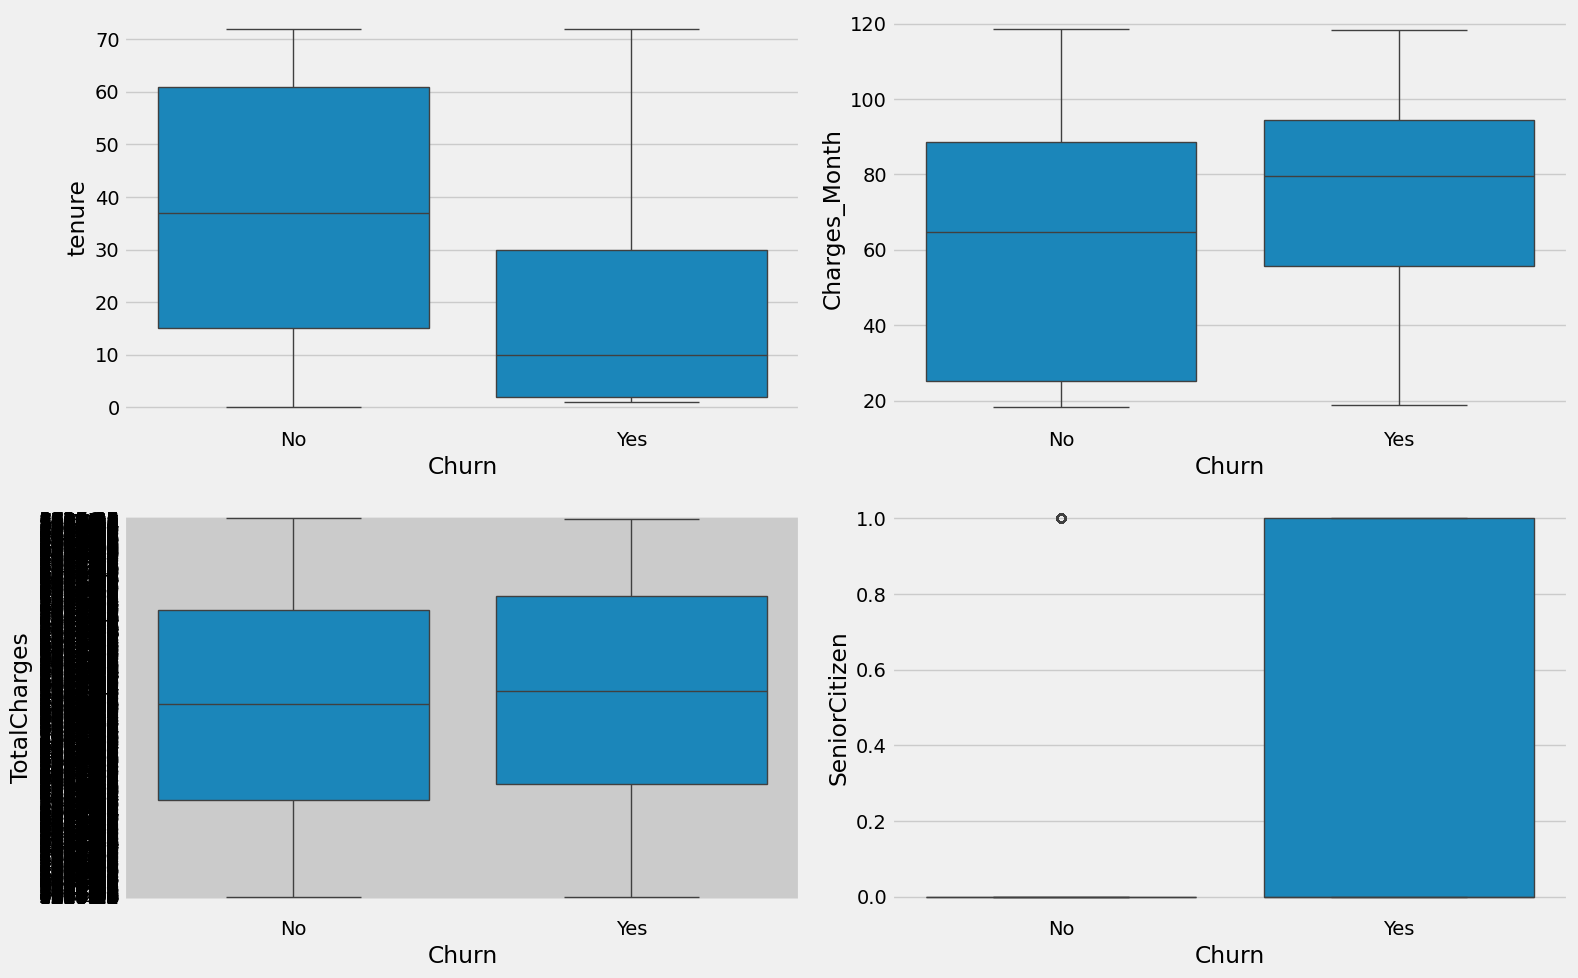

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(x='Churn', y='tenure', data=df, ax=ax[0][0])
sns.boxplot(x='Churn', y='Charges_Month', data=df, ax=ax[0][1])
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=ax[1][0])
sns.boxplot(x='Churn', y='SeniorCitizen', data=df, ax=ax[1][1])

plt.tight_layout()
plt.show()


**From above Plots we can conclude that:-**



*   There is no significant difference in credit score distribution etween custers which are churned or not.
*   The older customers are churning more than younger ones.
*   Bank is loosing customers with significant bank balance.
*   Estimated Salary does not have a significant on the likelihood to churn.
*   Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
*   Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.



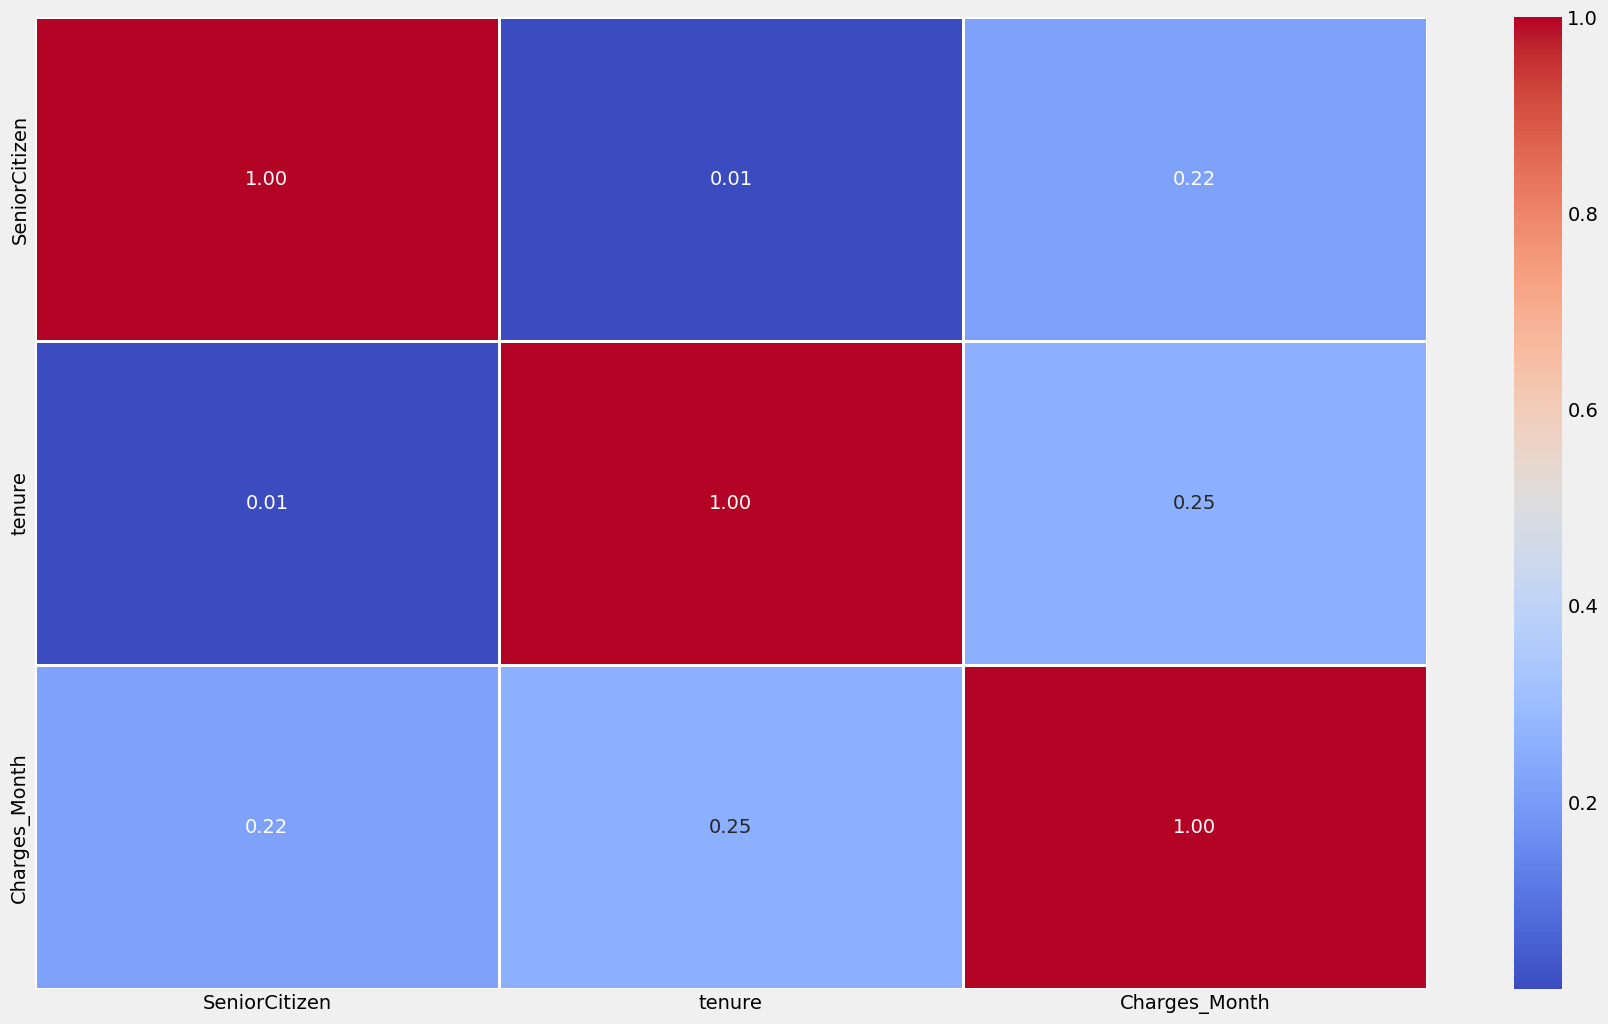

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(20, 12))

corr = numeric_cols.corr()

sns.heatmap(corr, linewidths=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


**We can say that there is no multicolinearity present in data.**

In [44]:
# Assuming 'df' is your DataFrame containing the dataset
columns_to_drop = []  # List columns you want to drop here, if any

# Drop columns if they exist in the DataFrame
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Print the updated DataFrame to verify changes
print(df.head())


          cID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4223-BKEOR  Female              0      No        Yes      21          Yes   
1  6035-RIIOM  Female              0      No         No      54          Yes   
2  3797-VTIDR    Male              0     Yes         No       1           No   
3  2568-BRGYX    Male              0      No         No       4          Yes   
4  2775-SEFEE    Male              0      No        Yes       0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL            Yes  ...              Yes   
1               Yes     Fiber optic             No  ...               No   
2  No phone service             DSL             No  ...               No   
3                No     Fiber optic             No  ...               No   
4               Yes             DSL            Yes  ...               No   

  TechSupport TV_Streaming Movie_Streaming        Contract Pap

In [46]:
# Assuming 'df' is your DataFrame containing the dataset

# Count the values in the 'InternetService' column
internet_service_counts = df.InternetService.value_counts()

# Print the counts
print(internet_service_counts)


InternetService
Fiber optic    2481
DSL            1939
No             1214
Name: count, dtype: int64


In [48]:
# Assuming 'df' is your DataFrame containing the dataset

# Mapping for 'gender' column (assuming it's lowercase based on your description)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Print the updated DataFrame to verify changes
print(df.head())


          cID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4223-BKEOR       1              0      No        Yes      21          Yes   
1  6035-RIIOM       1              0      No         No      54          Yes   
2  3797-VTIDR       0              0     Yes         No       1           No   
3  2568-BRGYX       0              0      No         No       4          Yes   
4  2775-SEFEE       0              0      No        Yes       0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL            Yes  ...              Yes   
1               Yes     Fiber optic             No  ...               No   
2  No phone service             DSL             No  ...               No   
3                No     Fiber optic             No  ...               No   
4               Yes             DSL            Yes  ...               No   

  TechSupport TV_Streaming Movie_Streaming        Contract Pap

In [49]:
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,1,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,1,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,0,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,0,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [52]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert 'Churn' column to numerical labels
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Separate features and labels
X = df.drop('Churn', axis=1)
y = to_categorical(df['Churn'])

# Now 'y' should be in a format compatible with to_categorical


In [53]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your original DataFrame and X contains your features
X = df.drop(['Churn'], axis=1)  # Drop unnecessary columns
y = df['Churn']

# Drop non-numeric columns from X
X_numeric = X.select_dtypes(include=['number'])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


**Building ANN**

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is your original DataFrame and X contains your features
X = df.drop(['Churn'], axis=1)  # Drop unnecessary columns
y = df['Churn']

# Drop non-numeric columns from X
X_numeric = X.select_dtypes(include=['number'])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Initialize ANN
model = Sequential()

# Add the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer='normal', activation='relu', input_shape=(X_train_scaled.shape[1], )))

# Adding batch normalization and dropout layer
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))

# Add the second hidden layer
model.add(Dense(7, kernel_initializer='normal', activation='relu'))

# Adding batch normalization and dropout layer
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))

# Add the output layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training set
model_history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)


Epoch 1/100
141/141 [==============================] - 2s 6ms/step - loss: 0.6219 - accuracy: 0.6705 - val_loss: 0.6270 - val_accuracy: 0.7294
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5305 - accuracy: 0.7550 - val_loss: 0.5681 - val_accuracy: 0.7294
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.7717 - val_loss: 0.5126 - val_accuracy: 0.7365
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4743 - accuracy: 0.7806 - val_loss: 0.4771 - val_accuracy: 0.7791
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4670 - accuracy: 0.7772 - val_loss: 0.4735 - val_accuracy: 0.7587
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4644 - accuracy: 0.7848 - val_loss: 0.4648 - val_accuracy: 0.7631
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7819 - val_loss: 0.4616 - val_accuracy: 0.7835

**Visualizing Training and Validation Loss**

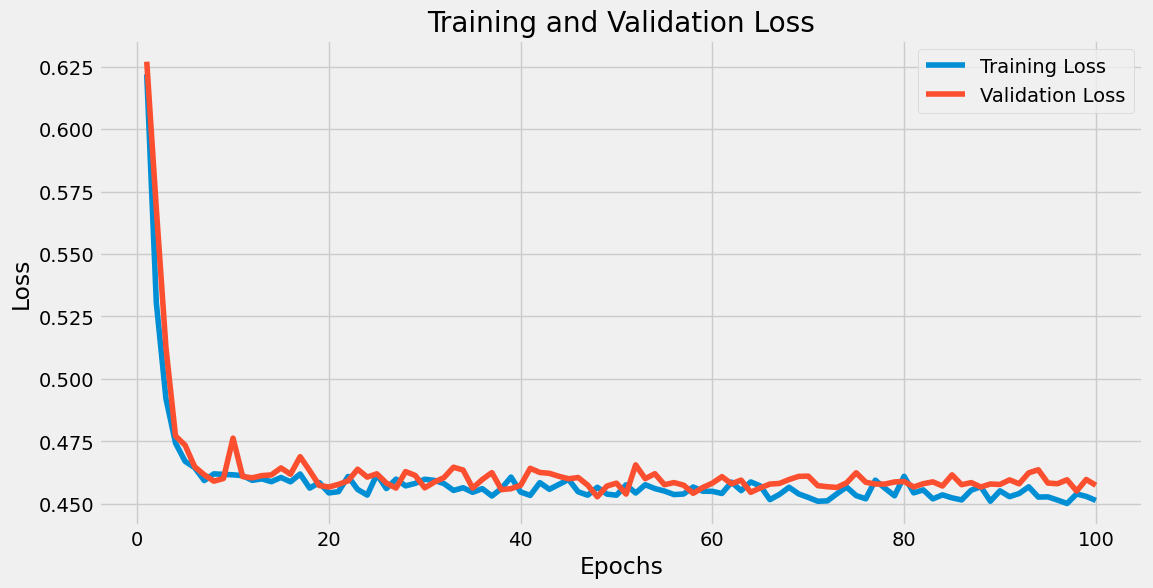

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model_history is defined and contains history from model.fit()

plt.figure(figsize=(12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

sns.lineplot(x=epochs, y=train_loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Visualizing Training and Validation accuracy**

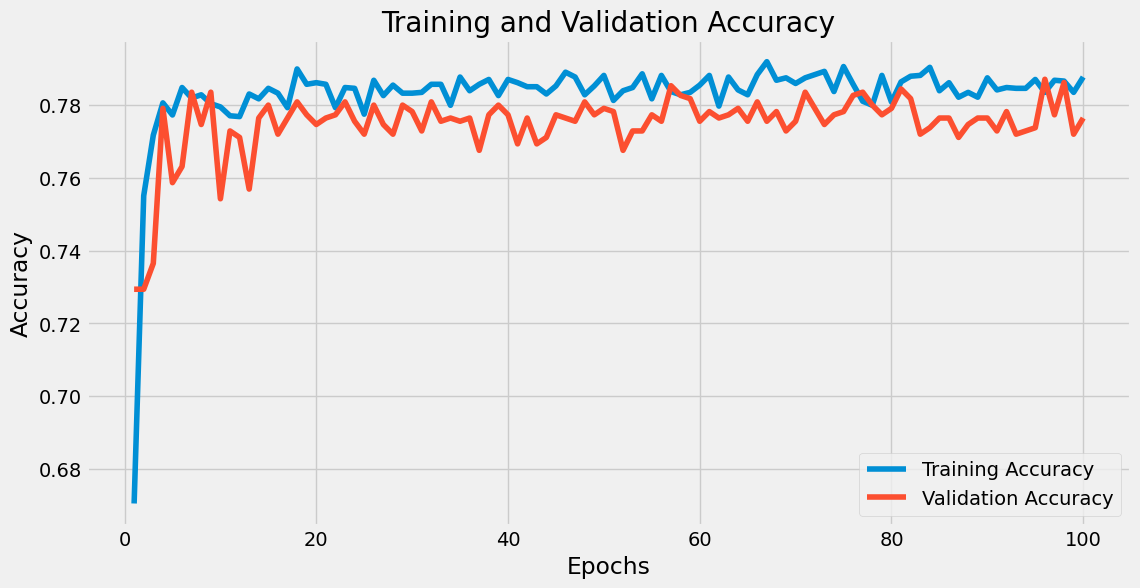

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model_history is defined and contains history from model.fit()

plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [67]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

36/36 [==============================] - 0s 2ms/step - loss: 7.3353 - accuracy: 0.7276
Accuracy of model is 0.7275953888893127


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 batch_normalization_2 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 77        
                                                                 
 batch_normalization_3 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 7)                

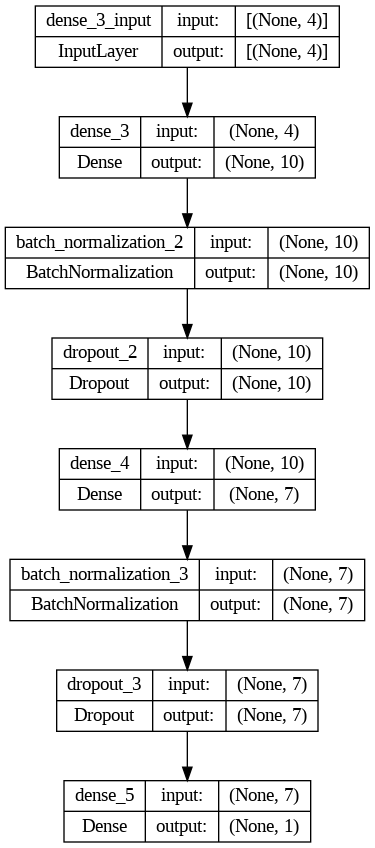

In [69]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)